<a href="https://colab.research.google.com/github/sugengprastiyo/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Mengubah tingkat kecerahan citra
----------------------------------
Masukkan nilai kecerahan: 50


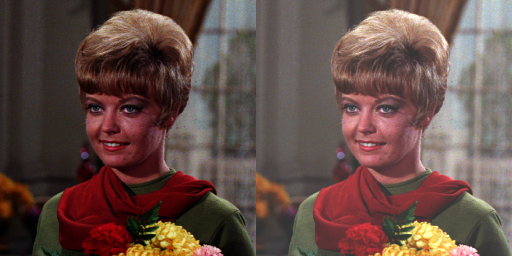

In [33]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range (original.shape[1]):
        for c in range (original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
----------------------------------
Masukkan nilai kecerahan: 50
Masukkan nilai kontras: 2


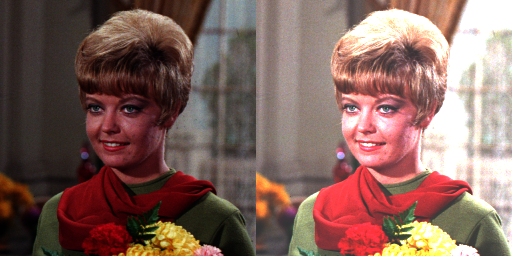

In [34]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
    contras   = int(input('Masukkan nilai kontras: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)


#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(contras*original[y,x,c] + brightness, 0, 255)
  

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan tranformasi LOG
----------------------------------
Masukkan nilai kecerahan: 50


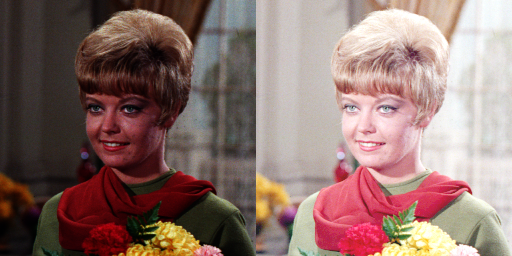

In [35]:
print('Mengubah tingkat kecerahan citra dengan tranformasi LOG')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)


#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(brightness * np.log(original[y,x,c] + 1), 0, 255)
  

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

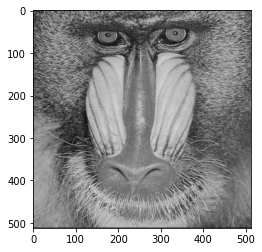

In [39]:
#No3
#Averaging
imgavg = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
imgavg[:] = imgavg.mean(axis=-1, keepdims=1)
plt.imshow(imgavg)

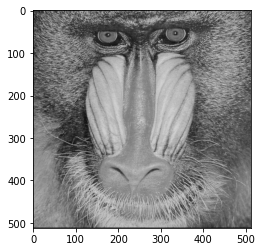

In [42]:
#Lightness
imglight = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
imglight[:] = np.max(imglight,axis=-1,keepdims=10)/2+np.min(imglight,axis=-1,keepdims=10)/2
plt.imshow(imglight)

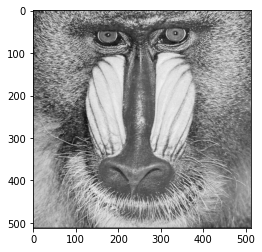

In [43]:
#Luminance
imagel = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
R, G, B = imagel[:,:,0], imagel[:,:,1], imagel[:,:,2]

gray_imagelum = (0.21 * R) + (0.72 * G) + (0.07 * B)

plt.imshow(gray_imagelum, cmap='gray')

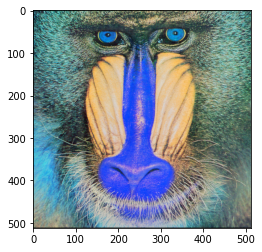

In [46]:
imgtgs = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
plt.imshow (imgtgs, cmap='Oranges_r')

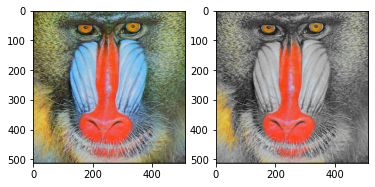

In [49]:
#TGS4
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2RGB)
ret, mask = cv.threshold(img[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_color, mask3)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_color)
ax[1].imshow(out, cmap='gray')